In [21]:
from sklearn import datasets
digits = datasets.load_digits()

In [22]:
digits['images'].shape

(1797, 8, 8)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

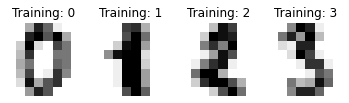

In [24]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

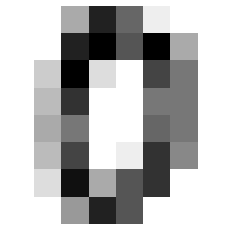

In [5]:
plt.axis('off')
plt.imshow(images_and_labels[0][0], cmap=plt.cm.gray_r, interpolation='nearest')
images_and_labels[0][0]

In [25]:
import numpy as np

In [27]:
U, s, V = np.linalg.svd(images_and_labels[0][0], full_matrices=False)

In [37]:
V.shape

(8, 8)

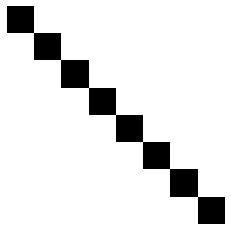

In [34]:
plt.axis('off')
plt.imshow(np.dot(U, U.T), cmap=plt.cm.gray_r, interpolation='nearest')
#plt.imshow(np.dot(V, V.T), cmap=plt.cm.gray_r, interpolation='nearest')
#plt.imshow(np.dot(V, V.T), cmap=plt.cm.gray_r, interpolation='nearest')

In [29]:
svd_res = np.dot(np.dot(U, np.diag(s)), V)

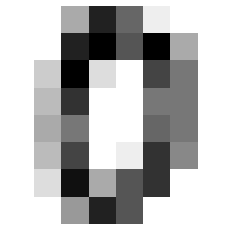

In [38]:
plt.axis('off')
plt.imshow(svd_res, cmap=plt.cm.gray_r, interpolation='nearest')

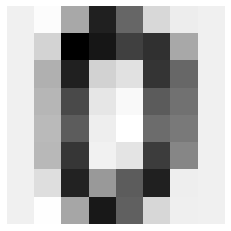

In [45]:
k = 3
reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))

plt.axis('off')
plt.imshow(reconst_matrix, cmap=plt.cm.gray_r, interpolation='nearest');

In [12]:
from numpy.linalg import svd

In [13]:
def compress_svd(image,k):
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    return reconst_matrix,s

In [46]:
def compress_show_gray_images(img_name,k):
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [47]:
from PIL import Image
import requests
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

from ipywidgets import interact, IntSlider, FloatSlider

interact(compress_show_gray_images,
         img_name=list(gray_images.keys()),
         k=(1,300));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'camera', 'coin', 'clock', 'bl…

In [49]:
rgb2gray(img_as_float(data.chelsea())).shape

(300, 451)